# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['DESCR', 'feature_names', 'data', 'target'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

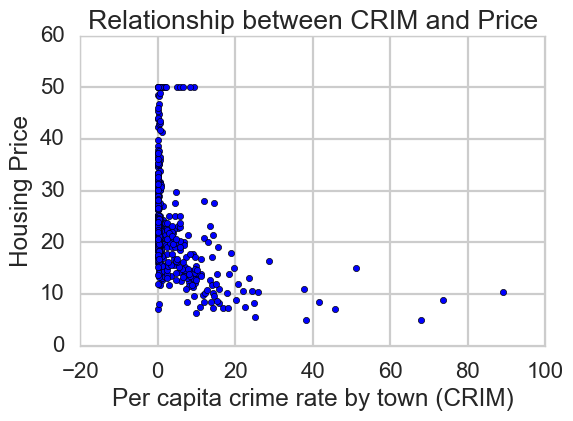

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

In [13]:
# Answers to Part 2 Exercise Set 1
# Question 1) What kind of relationship do you see? e.g. positive, negative?
#             linear? non-linear? Is there anything else strange or interesting about
#             the data? What about outliers?

#             I see a weak negative linear relationship.  Yes, the data looks interesting in
#             that its distribution appears to be positively skewed and has a few outliers.

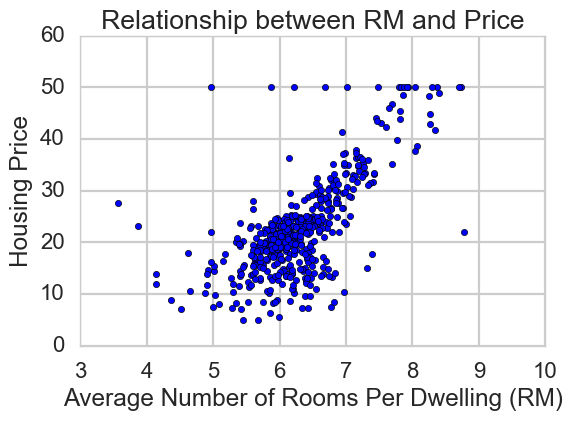

In [14]:
# Part 2 Exercise Set 1 
# Question 2: Create scatter plots between *RM* and *PRICE*, and PTRATIO and PRICE.
#             Label your axes appropriately using human readable labels.
#             Tell a story about what you see.

# Create scatter plots between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms Per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")


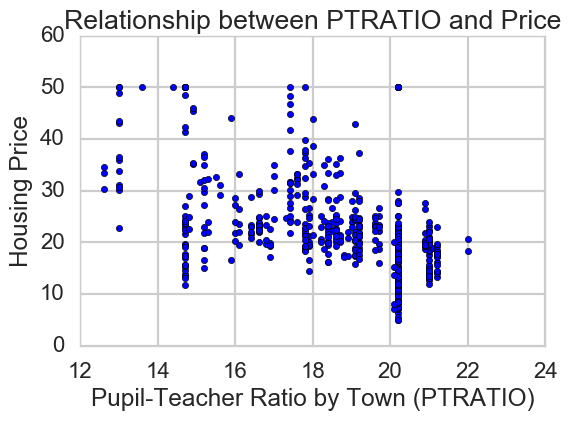

In [15]:
# Part 2 Exercise Set 1:
# Create scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio by Town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [16]:
# Question 2 continuation: it appears that a positive linear 
#     relationship seemed to exist in the graph between average 
#     number of rooms per dwelling and housing price.

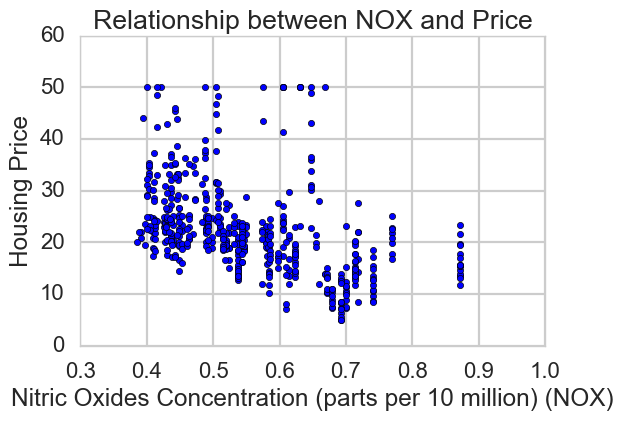

In [17]:
# your turn: create some other scatter plots
# scatter plot between *NOX* and *PRICE*
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitric Oxides Concentration (parts per 10 million) (NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

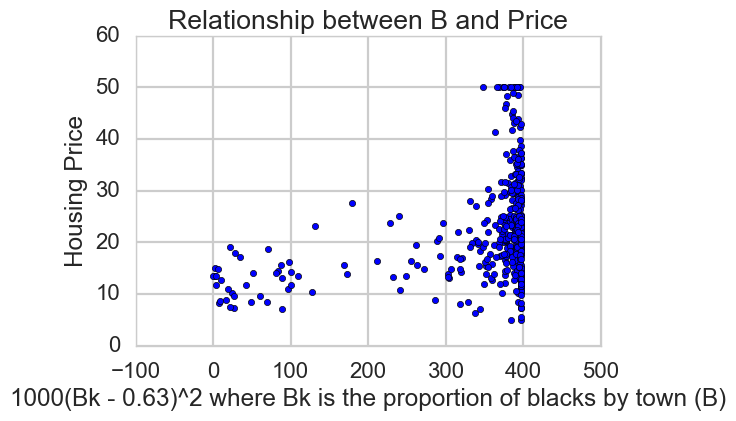

In [18]:
# Exercise 1: What are some other numeric variables of interest? Why do you think
#    they are interesting? Plot scatterplots with these variables and
#    PRICE (house price) and tell a story about what you see.

#    In my opinion, other variables of interest would be nitric oxides
#    concentration since it can describe pollutants in the area.
#    Another is the column describing percent of black population
#    that may describe neighborhood housing prices.

# your turn: create some other scatter plots
# Create a scatter plot between *NOX* and *PRICE*
plt.scatter(bos.B, bos.PRICE)
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (B)")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")

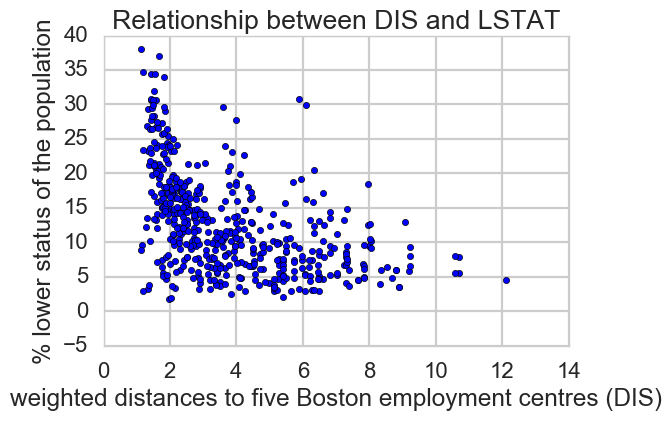

In [19]:
# your turn: create some other scatter plots
# Create a scatter plot between *DIS* and *LSTAT*
plt.scatter(bos.DIS, bos.LSTAT)
plt.xlabel("weighted distances to five Boston employment centres (DIS)")
plt.ylabel("% lower status of the population")
plt.title("Relationship between DIS and LSTAT")

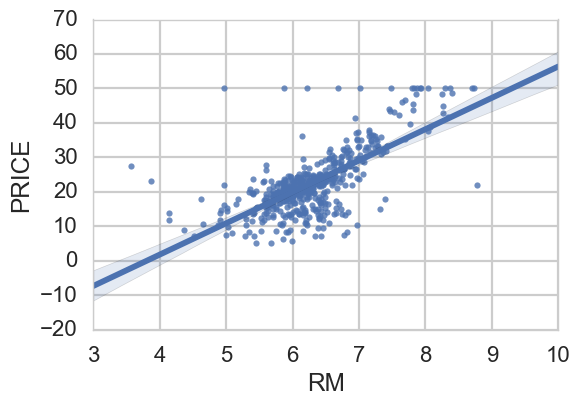

In [20]:
import seaborn as sns
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


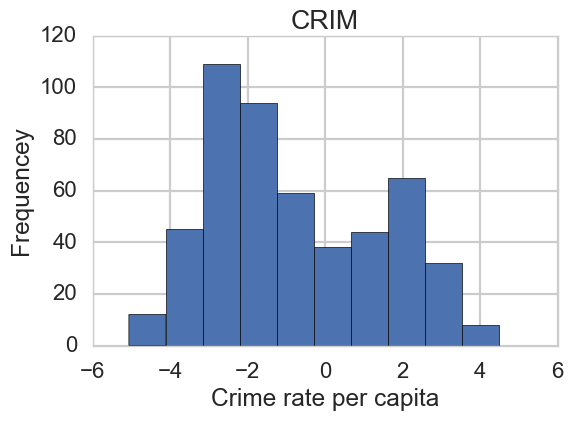

In [21]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

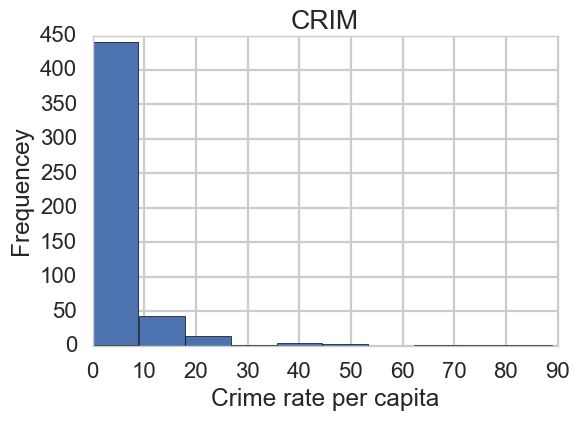

In [22]:
# Part 2 Exercise 1: In the above histogram, we took the logarithm of the crime rate per 
# capita. Repeat this histogram without taking the log.

plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

# Exercise 2 Question 1 continuation: What was the purpose of taking the log? What do we gain 
#      by making this transformation? What do you now notice about this variable that is not 
#      obvious without making the transformation? 

#      We usually take logarithms of variables that are multiplicatively related or in other
#      words it's growing exponentially in time. By taking logarithms of variables before
#      plotting the data, any exponential nature of variables is taken out of equation so
#      that we can see the pattern in a linear model if that's the case. Logging in short,
#      is similar to deflaton so that a trend can be straightened out and a linear model
#      can be fitted.

#      Before taking the logarithm of the variable, it's obvious that it's exponential in nature.

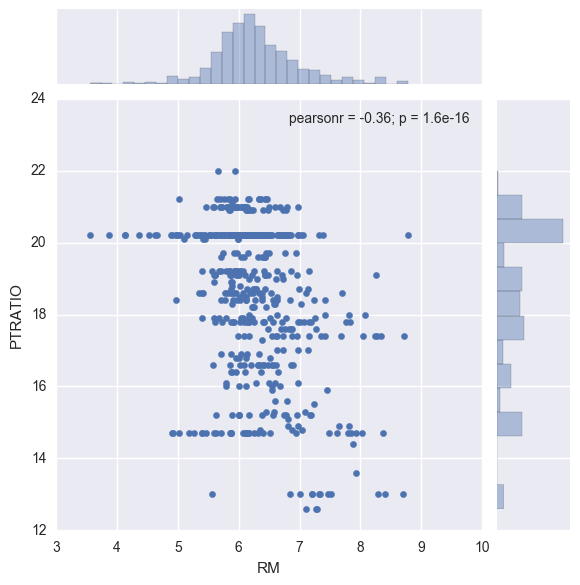

In [23]:
# Part 2 Exercise 2:
#          Plot the histogram for RM and PTRATIO against each other, along 
#          with the two variables you picked in the previous section. We 
#          are looking for correlations in predictors here.

import seaborn as sns
sns.set(color_codes=True)

sns.jointplot(bos.RM, bos.PTRATIO)

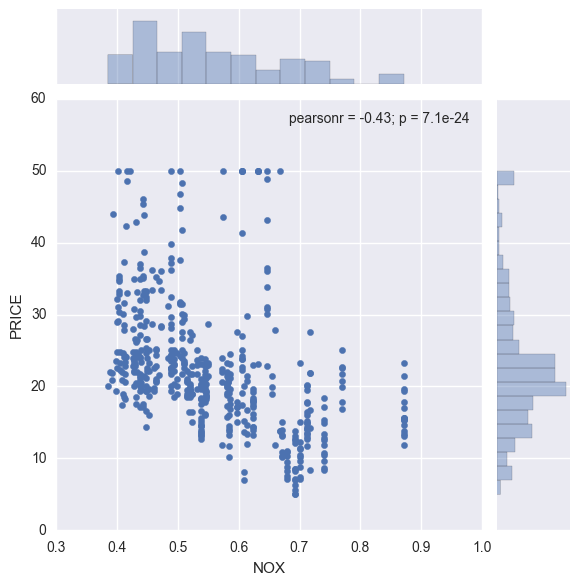

In [24]:
# Part 2 Exercise 2 Continuation:
#          Plot the histogram for the two variables you picked in 
#          the previous section. 

import seaborn as sns
sns.set(color_codes=True)

sns.jointplot(bos.NOX, bos.PRICE)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

In [25]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           2.49e-74
Time:                        11:26:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

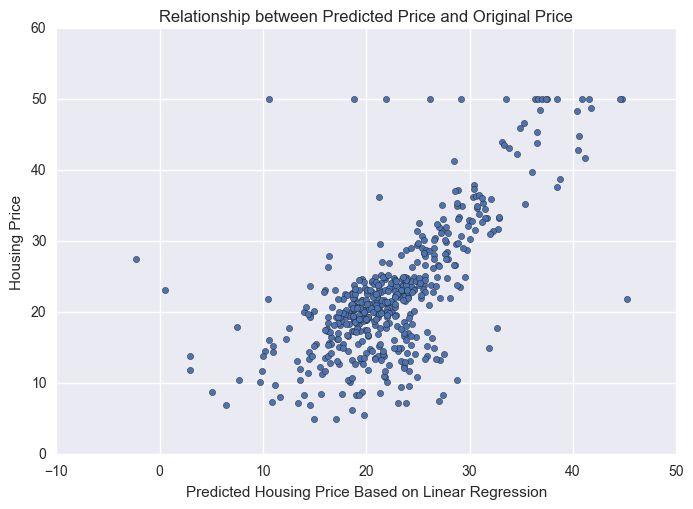

In [27]:
# Part 3 Exercise 1: Create a scatterplot between the predicted prices,
# available in m.fittedvalues (where m is the fitted model)
# and the original prices.

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()

# Create the scatter plot between predicted values and *PRICE*
plt.scatter(m.predict(), bos.PRICE)
plt.xlabel("Predicted Housing Price Based on Linear Regression")
plt.ylabel("Housing Price")
plt.title("Relationship between Predicted Price and Original Price")

### Fitting Linear Regression using `sklearn`


In [28]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [30]:
# Part 3 Exercise 2 Question:
#   How would you change the model to not fit an intercept term?
#   Would you recommend not having an intercept? Why or why not?

#   To change the model to not fit an intercept term then
#   we need to fit a linear regression through the origin (RTO).
#   Using sklearn's LinearRegression function, I will have to set
#   the fit_intercept parameter to False.

#   As far as recommending whether to have an intercept or not,
#   this would depend on the data set. Hocking (1996) and Adelman
#   et.al. (1994) have found that a careful change of data range
#   and data size needs to be considered.  For example, if the
#   data is far from the origin then fitting through the origin
#   might present a discontinuity from an otherwise linear
#   function with a positive or negative intercept. If uncertain,
#   then one might run a couple of diagnostics.  Hahn (1977)
#   suggested to run a fit with and without an intercept then
#   compare the standard errors to decide whether OLS or RTO 
#   provides a superior fit.

In [31]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280361116


In [32]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [34]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

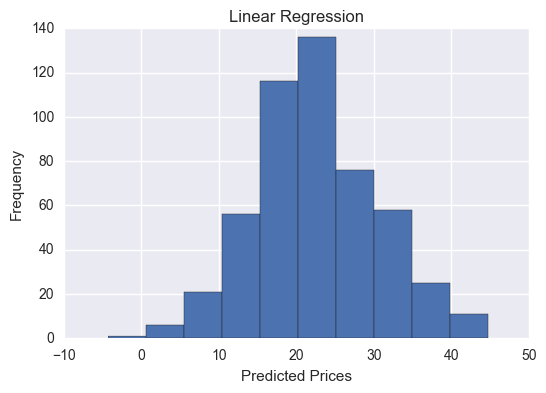

In [35]:
# Part 3 Exercise Set III:
#    Question 1: Histogram: Plot a histogram of all the predicted prices. Write a story 
#        about what you see. Describe the shape, center and spread of the distribution. 
#        Are there any outliers? What might be the reason for them? Should we do
#        anything special with them?

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.hist(lm.predict(X))
plt.title("Linear Regression")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

#  The graph appears to be symmetric and bell-shaped, showing a normal 
#  distribution. The center seems to be around 20 in the x-axis.
#  The spread of the distribution is from -5 to 45.  Yes, there
#  are outliers in the form of negative valued prices.

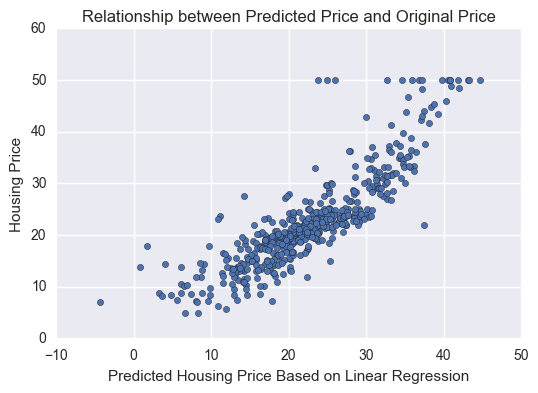

In [36]:
# Part 3 Exercise Set III
#    Question 2: Scatterplot: Let's plot the true prices compared to
#       the predicted prices to see they disagree 
#      (we did this with statsmodels before).

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Create the scatter plot between predicted values and *PRICE*
plt.scatter(lm.predict(X), bos.PRICE)
plt.xlabel("Predicted Housing Price Based on Linear Regression")
plt.ylabel("Housing Price")
plt.title("Relationship between Predicted Price and Original Price")

#   Question 3: We have looked at fitting a linear model in both
#          statsmodels and scikit-learn. What are the advantages 
#          and disadvantages of each based on your exploration? 
#          Based on the information provided by both packages, 
#          what advantage does statsmodels provide?

In [37]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149877


In [38]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

2.61725115691e-23


In [39]:
# Part 3 Exercise Set IV:

# Question 1: Fit a linear regression model using only the Pupil-teacher
# ratio by town (PTRATIO) column and interpret the coefficients.
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd

lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))


Estimated intercept coefficient: 62.344627474832706
Number of coefficients: 1


In [40]:
# Exercise 2: Calculate (or extract) the R2 value. What does it tell you?
lm.score(X[['PTRATIO']], bos.PRICE)

0.257847318009223

In [41]:
# Exercise 3: Compute the F-statistic. What does it tell you?
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           1.61e-34
Time:                        11:26:23   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [42]:
# Part 3 Exercise Set V
# Fit a linear regression model using three independent variables
#   1) 'CRIM' (per capita crime rate by town) 
#   2) 'RM' (average number of rooms per dwelling)
#   3) 'PTRATIO' (pupil-teacher ratio by town)
lm = LinearRegression()
lm.fit(X[['CRIM','RM','PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Calculate (or extract) the R2 value.
lm.score(X[['CRIM', 'RM', 'PTRATIO']], bos.PRICE)

0.59341415511369788

In [44]:
# Compute the F-statistic.
m = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           1.09e-97
Time:                        11:26:23   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [45]:
# Part 4
# Find another variable (or two) to add to the model we built in Part 3. 
# Compute the F-test comparing the two models as well as the AIC. Which model is better?
m = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + TAX',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     160.2
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          2.22e-101
Time:                        11:26:24   Log-Likelihood:                -1598.3
No. Observations:                 506   AIC:                             3209.
Df Residuals:                     500   BIC:                             3234.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.8739      4.522      1.299      0.1

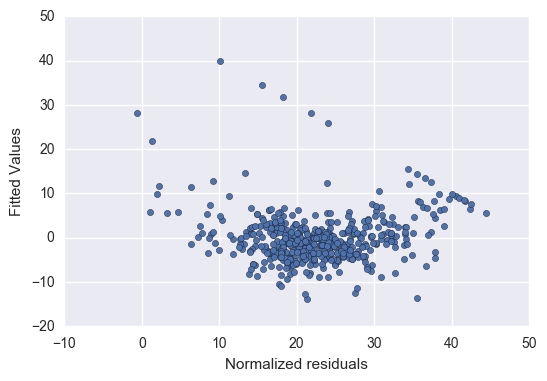

In [46]:
# Part 5 Exercise 1:
# Create a scatter plot of fitted values versus residuals
plt.scatter(m.fittedvalues, m.resid)
plt.ylabel("Fitted Values")
plt.xlabel("Normalized residuals")

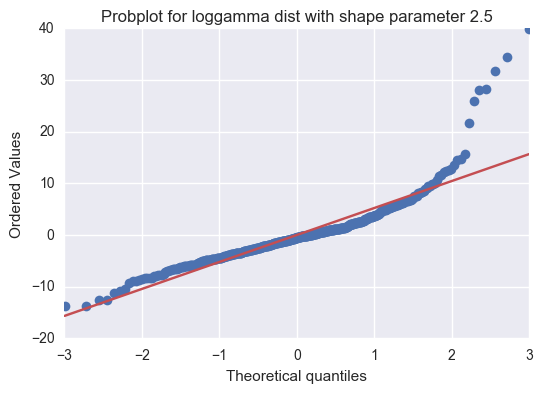

In [47]:
# Part 5 Exercise 2:
# Construct a quantile plot of the residuals.
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.loggamma.rvs(c=2.5, size=500)
res = stats.probplot(m.resid, plot=ax)
ax.set_title("Probplot for loggamma dist with shape parameter 2.5")
plt.show()


In [48]:
# Part 5 Exercise 3:
#     What are some advantages and disadvantages of the fitted vs. 
#     residual and quantile plot compared to each other?
# Answer: The fitted vs. residual plot is the most frequently
#         created plot using residuals analysis. Adavatages of
#         plotting it is to be able to determine non-linearity,
#         unequal error variances and outliers.